In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class SlotMachine:
    def __init__(self, num_of_actions, color):
        standard_deviations = np.ones((num_of_actions,1))*0.01
        means = np.random.rand(num_of_actions,1)
        self.action = np.concatenate((standard_deviations,means),axis=1)
        self.color = color
        self.Q = np.zeros((num_of_actions,1))
        self.N = np.zeros((num_of_actions,1))
        print("Machine:",color)
        print("num_of_actions:",num_of_actions)
        print("expected reward:",round(np.max(means),2))
        print("--------------")
        
    def pull(self, action_num):
        # mean and standard deviation
        standard_deviation = self.action[action_num][0]
        mean = self.action[action_num][1]
        return np.random.normal(mean,standard_deviation)

In [3]:
def choose_action(Q,epsilon):
    if random.random() < epsilon:
        return random.randint(0,Q.shape[0]-1)
    else:
        return np.argmax(Q)

In [4]:
NUM_OF_ACTIONS = 10

In [5]:
sm1 = SlotMachine(NUM_OF_ACTIONS,"blue")
sm2 = SlotMachine(NUM_OF_ACTIONS,"red")
sm3 = SlotMachine(NUM_OF_ACTIONS,"green")
sm4 = SlotMachine(NUM_OF_ACTIONS,"yellow")
machines = [sm1,sm2,sm3,sm4]

Machine: blue
num_of_actions: 10
expected reward: 0.87
--------------
Machine: red
num_of_actions: 10
expected reward: 0.98
--------------
Machine: green
num_of_actions: 10
expected reward: 0.99
--------------
Machine: yellow
num_of_actions: 10
expected reward: 0.78
--------------


In [6]:
machine_to_index = {}
n = 0
for machine in machines:
    machine_to_index[machine.color] = n
    n += 1

In [7]:
machine_to_index

{'blue': 0, 'green': 2, 'red': 1, 'yellow': 3}

In [8]:
Q = np.zeros((len(machines),NUM_OF_ACTIONS))
N = np.zeros((len(machines),NUM_OF_ACTIONS))

In [9]:
Q

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
NUM_OF_STEPS = 10000

In [11]:
rewards = {}
average_rewards = []
cumulative_reward = 0
for i in range(NUM_OF_STEPS):
    random.shuffle(machines)
    machine = machines[0]
    index = machine_to_index[machine.color]
    
    action = choose_action(Q[index],0.01)
    # Take the action
    reward = machine.pull(action)
    if machine.color[0] not in rewards: rewards[machine.color[0]] = np.array([[i,reward]])
    else: rewards[machine.color[0]] = np.append(rewards[machine.color[0]],[[i,reward]],axis=0)
    cumulative_reward += reward
    average_rewards.append(cumulative_reward/(len(average_rewards)+1))
    
    # Update
    N[index][action] = N[index][action] + 1
    Q[index][action] = Q[index][action] + 1 / N[index][action] * (reward - Q[index][action])

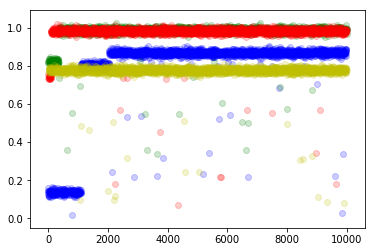

In [12]:
for key in rewards:
    plt.scatter(rewards[key][:,0],rewards[key][:,1],color=key,alpha=0.2)
plt.show()

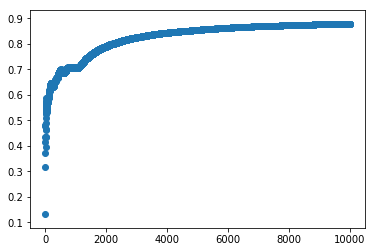

In [13]:
plt.scatter(range(NUM_OF_STEPS),average_rewards)
plt.show()